In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/__results__.html
/kaggle/input/student-performance-multiple-linear-regression/linear_model.pkl
/kaggle/input/student-performance-multiple-linear-regression/__notebook__.ipynb
/kaggle/input/student-performance-multiple-linear-regression/__output__.json
/kaggle/input/student-performance-multiple-linear-regression/custom.css
/kaggle/input/student-performance-multiple-linear-regression/__results___files/__results___20_1.png
/kaggle/input/student-performance-multiple-linear-regression/__results___files/__results___15_0.png
/kaggle/input/student-performance-multiple-linear-regression/__results___files/__results___9_2.png
/kaggle/input/student-performance-multiple-linear-regression/__results___files/__results___25_0.png
/kaggle/input/student-performance-multiple-linear-regression/__results___files/__results___28_1.png
/kaggle/input/student-performance-multiple-linear-regression/__results___files/__results___22_0.png
/kaggle/input/st

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Salary_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "abhishek14398/salary-dataset-simple-linear-regression",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipykernel_47/257491683.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [6]:
df.drop(str(df.columns[0]), axis=1, inplace=True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


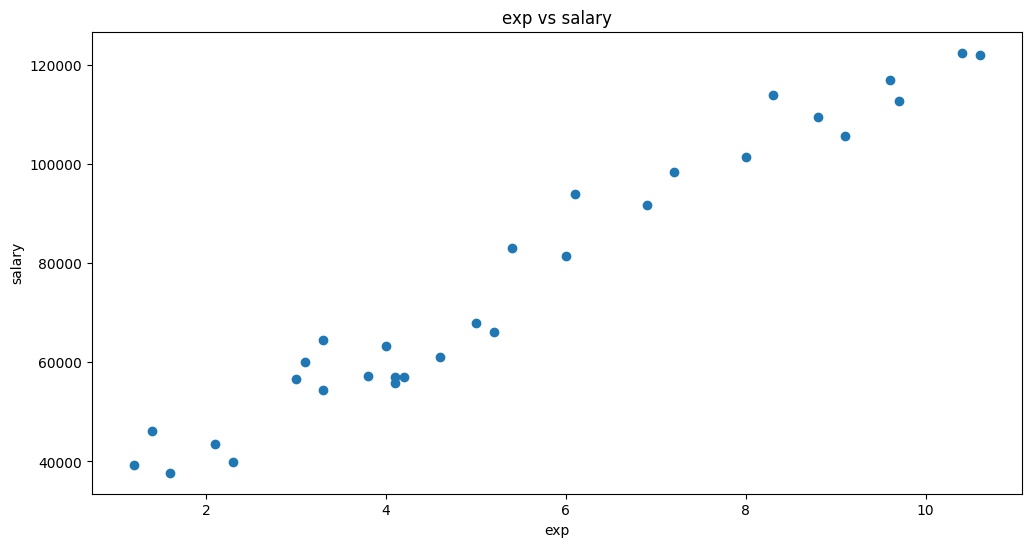

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel("exp")
plt.ylabel('salary')
plt.title("exp vs salary")
plt.show()

In [8]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
from sklearn.model_selection  import train_test_split
x,y = df[['YearsExperience']], df[['Salary']]
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.3)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21, 1)
(21, 1)
(9, 1)
(9, 1)


In [11]:
train_df = pd.DataFrame({"exp":x_train['YearsExperience'].values, "salary":y_train['Salary'].values})
test_df = pd.DataFrame({"exp":x_test['YearsExperience'].values, "salary":y_test['Salary'].values})

In [12]:
import statsmodels.formula.api as sm

model = sm.ols("salary ~ exp", data=train_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     569.0
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           1.27e-15
Time:                        09:48:53   Log-Likelihood:                -209.31
No. Observations:                  21   AIC:                             422.6
Df Residuals:                      19   BIC:                             424.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.619e+04   2505.321     10.454      0.0

In [13]:
test_results = result.predict(test_df)
test_results

0     65036.964807
1     53938.274143
2     76135.655472
3     64112.073919
4     40989.801702
5     82609.891692
6     68736.528362
7    107581.945687
8     72436.091917
dtype: float64

In [14]:
from sklearn import metrics

metrics.mean_absolute_error(test_df['salary'], test_results)

5925.299301439495

In [15]:
metrics.mean_squared_error(test_df['salary'], test_results)

43434893.07064837

In [16]:
np.sqrt(metrics.mean_absolute_error(test_df['salary'], test_results))

76.9759657389207

In [17]:
metrics.r2_score(test_df['salary'], test_results)

0.9006603372573537